In [115]:
# import necessary packages

import imageio
import scipy.ndimage as ndi
import numpy as np
import nibabel as nib
import matplotlib.pyplot as plt

In [114]:
'''----------------------------------------------------------------------------------------
Load and extract image data from the .nii files
-------------------------------------------------------------------------------------------
'''
# the path of a T1-weighted brain .nii image
p = "data/BRAIN.nii"
d = nib.load(p)

# access to the numpy array
d = (d.get_fdata()).T
print("[INFOS] 2D Array slice data type :", type(d)) #-> numpy array
print("[INFOS] Shape of 3D image array  :", d.shape)

[INFOS] 2D Array slice data type : <class 'numpy.memmap'>
[INFOS] Shape of 3D image array  : (166, 256, 256)


In [125]:
'''---------------------------------------------------------------------------------------
Plot grayscale random slices (2D arrays).raw the image in grayscale
------------------------------------------------------------------------------------------
'''
def viewPlot(d):
    fig, ax = plt.subplots(1,3, figsize=(16,10))
    ax[0].imshow(d[20],cmap='gray')
    ax[1].imshow(d[120],cmap='gray')
    ax[2].imshow(d[140],cmap='gray')

    ax[0].axis('off')
    ax[1].axis('off')
    ax[2].axis('off')

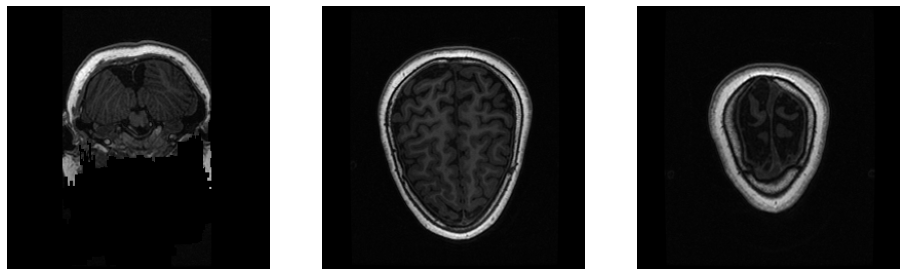

In [126]:
viewPlot(data)

In [123]:
'''---------------------------------------------------------------------------------------
Load one slice and show the necessary informations
    a - Check the intensity;
    b - Minimum intensity;
    c - Data type;
    d - Maximum intensity;

Note : Array's data types controls range of possible intensities.
------------------------------------------------------------------------------------------
'''

print('[INFOS] Data type             :', d.dtype)
print('[INFOS] Min. intensity value  :', d.min())
print('[INFOS] Mean intensity value  :', d.mean())
print('[INFOS] Max. intensity value  :', d.max())
print('[INFOS] Size of data          :', d.size)


[INFOS] Data type             : float64
[INFOS] Min. intensity value  : 0.0
[INFOS] Mean intensity value  : 535.6465138814535
[INFOS] Max. intensity value  : 10106.0
[INFOS] Size of data          : 10878976


[INFOS] Shape of hist     : (256,)


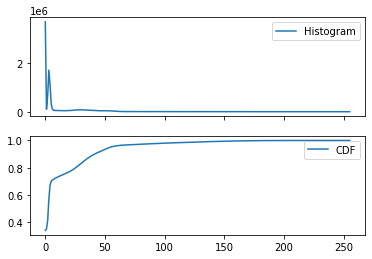

In [127]:
'''---------------------------------------------------------------------------------------
Plot of the histogram and CDF cumulative distribution function.
------------------------------------------------------------------------------------------
'''

# Create a histogram, binned at each possible value
hist = ndi.measurements.histogram(d, min=0, max=10106, bins=256)
# Create a cumulative distribution function
cdf = hist.cumsum() / hist.sum()

# Histogram for the in16 data type
# Plot the histogram and CDF

fig, axes = plt.subplots(2, 1, sharex=True)
axes[0].plot(hist, label='Histogram')
axes[1].plot(cdf, label='CDF')
axes[0].legend()
axes[1].legend()

print("[INFOS] Shape of hist     :", hist.shape)

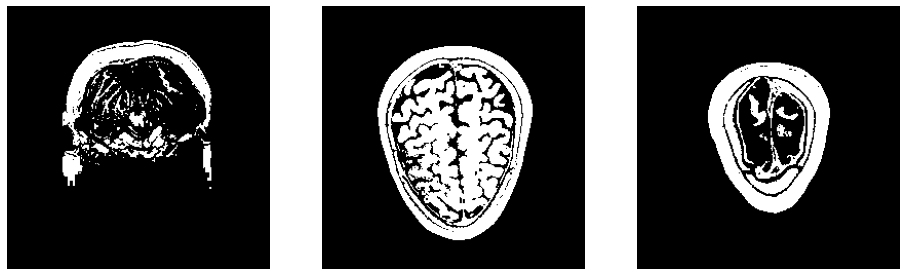

In [128]:
'''---------------------------------------------------------------------------------------
Create a brain mask by removing all non brain tissue.
Screen out non-bone pixels from
------------------------------------------------------------------------------------------
'''

im = d.copy()
maskIm = im>900
viewPlot(maskIm)

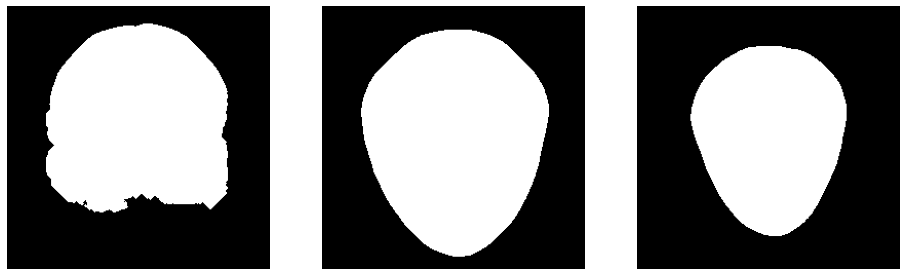

In [135]:
'''---------------------------------------------------------------------------------------
Create a head mask by removing all non brains tissues.
------------------------------------------------------------------------------------------
'''

maskIm = ndi.binary_dilation(maskIm, iterations=8)
maskIm = ndi.binary_closing(maskIm, iterations=8)
viewPlot(maskIm)

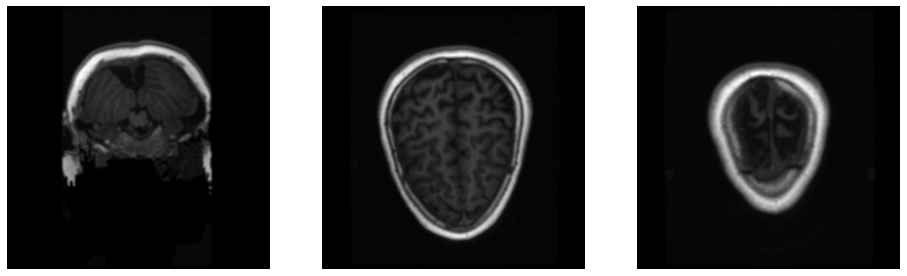

In [136]:
'''---------------------------------------------------------------------------------------
Smoothing of the head with a mean filtering (each element of the kernel is set to 0.11)
------------------------------------------------------------------------------------------
'''

w = 0.11 * np.ones([3, 3, 3])
imFilt = ndi.convolve(im, w)
viewPlot(imFilt)

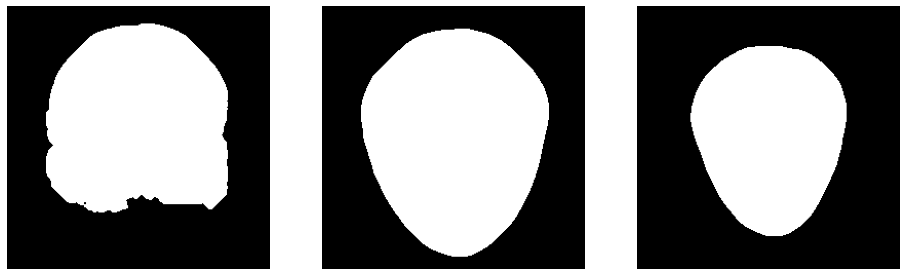

In [138]:
'''---------------------------------------------------------------------------------------
Smoothing of the head with a mean filtering (each element of the kernel is set to 0.11)
------------------------------------------------------------------------------------------
'''

imH = ndi.convolve(maskIm, w)
viewPlot(imH)

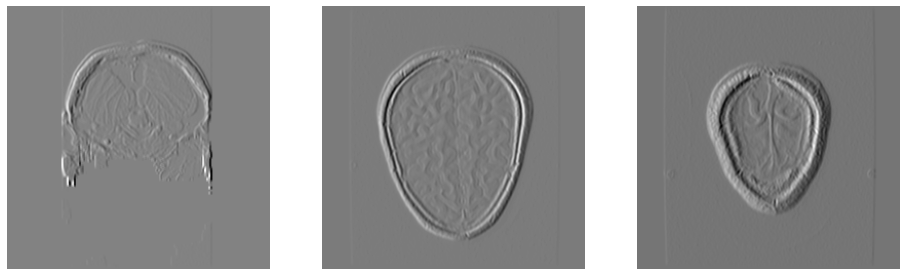

In [150]:
'''---------------------------------------------------------------------------------------
Edge detection
Create a filter to be used as a detector, change of intensity from the left to the right.
Use only 1, 0 and -1 by convolving the image with the detectors.
------------------------------------------------------------------------------------------
'''

k = np.zeros([3, 3, 3])
k[0] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
k[1] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])
k[2] = np.array([[1, 0, -1], [1, 0, -1], [1, 0, -1]])

imE = ndi.convolve(im, k)
viewPlot(imE)

In [142]:
sAx0 = ndi.sobel(d, axis=0)
sAx1 = ndi.sobel(d, axis=1)
edges = np.sqrt(np.square(sAx0) + np.square(sAx1))

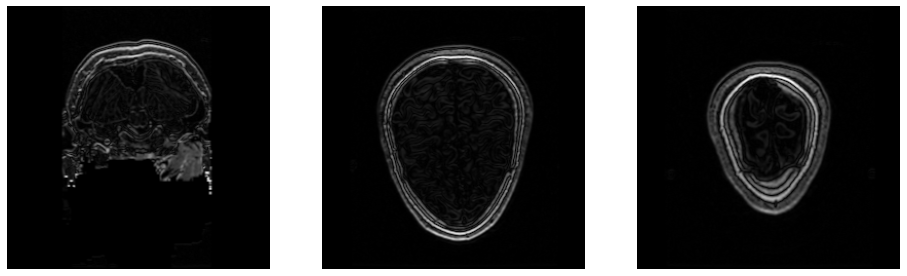

In [144]:
viewPlot(edges)